# Lab FSK
#### Rodrigo Belisário Ramos

[1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1]
[3. 3. 3. ... 3. 3. 3.]


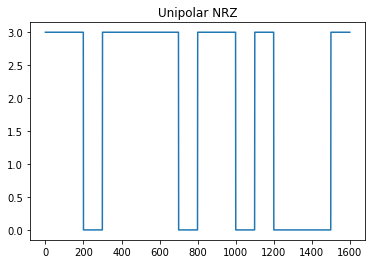

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import math

bits = np.random.randint(2, size=16)
print(bits)

# bit size
fs = 100e3  #frequencia do sinal amostragem
T_s = 1e-3 # intervalo de bit (periodo por bit)
Tb = T_s
num_amostras_por_bit = int(fs*T_s)


# NRZ Unipolar
Eb = 9
A = np.sqrt(Eb)   #amplitude do pulso
UNRZ = np.array([])

for i in bits:
  if i == 1:
    UNRZ = np.append(UNRZ, A * np.ones(num_amostras_por_bit))
  elif i == 0:
    UNRZ = np.append(UNRZ, np.zeros(num_amostras_por_bit))


fig, axs = plt.subplots()
fig.set_facecolor('w')
axs.plot(UNRZ)
axs.set_title('Unipolar NRZ')
print(UNRZ)

[0. 0. 0. ... 0. 0. 0.]


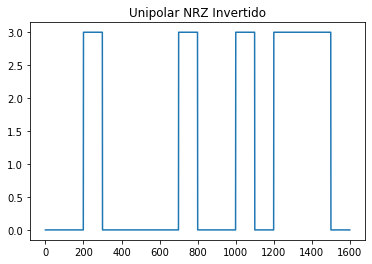

In [10]:
#sinal invertido
invUNRZ = np.where(UNRZ==np.sqrt(Eb), 0, np.sqrt(Eb))

fig, axs = plt.subplots()
fig.set_facecolor('w')
axs.plot(invUNRZ)
axs.set_title('Unipolar NRZ Invertido')
print(invUNRZ)

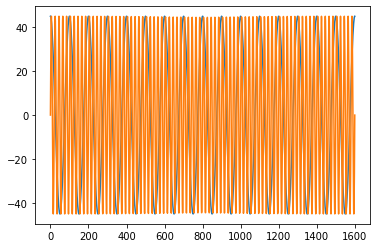

In [11]:
# funções base
fc1 = 1e3
fc2 = 5e3
t = np.linspace(0,T_s*len(bits), num_amostras_por_bit*len(bits))

phi_1 = np.sqrt(2/Tb)*np.cos(2*np.pi*fc1*t)
phi_2 = np.sqrt(2/Tb)*np.sin(2*np.pi*fc2*t)

fig, axs = plt.subplots()
fig.set_facecolor('w')
axs.plot(phi_1)
axs.plot(phi_2)

(0.0, 1000.0)

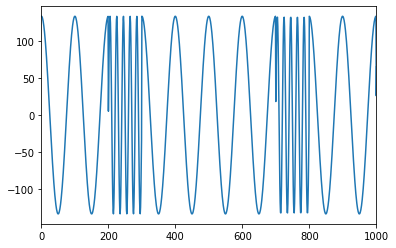

In [12]:
# multiplicando os sinais pelas bases 

sfsk = []
# for b, b_inv in zip(UNRZ, invUNRZ):
#     sfsk = np.append(sfsk, (b*phi_1 + b_inv*phi_2))

sfsk = UNRZ*phi_1 + invUNRZ*phi_2

fig, axs = plt.subplots()
fig.set_facecolor('w')
axs.plot(sfsk)
axs.set_xlim([0,1000])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-10000.0, 10000.0)

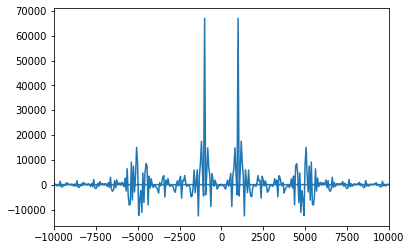

In [13]:
sfsk_fft = np.fft.fft(sfsk)
sfsk_freq= np.fft.fftfreq(len(sfsk), (1/100000))

fig, axs = plt.subplots()
fig.set_facecolor('w')
axs.plot(sfsk_freq, sfsk_fft)
axs.set_xlim([-10000, 10000])

[1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1]
[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.]


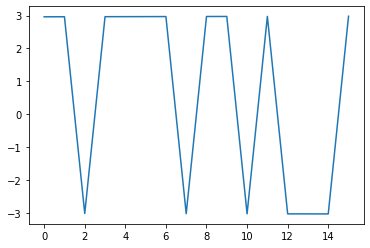

In [14]:
# Detecção Coerente
# Reajustando as funções base para a escala do sinal
ts = np.linspace(0,T_s*bits.size, sfsk.size)
phi_1 = np.sqrt(2/T_s)*np.cos(2*np.pi*fc1*ts)
phi_2 = np.sqrt(2/T_s)*np.sin(2*np.pi*fc2*ts)

dx1 = sfsk*phi_1
dx2 = sfsk*phi_2

from scipy.integrate import simps

tx= np.linspace(0, T_s, 100)
X = np.array([])
Y = np.array([])
for x in range(bits.size):
    X = np.append(X, simps(dx1[tx.size*x:tx.size*(x+1)], tx))
    Y = np.append(Y, simps(dx2[tx.size*x:tx.size*(x+1)], tx))
yout = X-Y
bits_received = np.array([])
for x in yout:
    if x>0:
        bits_received = np.append(bits_received, 1)
    else:
        bits_received = np.append(bits_received, 0)
print(bits)
print(bits_received)

fig, axs = plt.subplots()
fig.set_facecolor('w')
axs.plot(yout)

